<h1 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERÍA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERÍA EN COMPUTACION</h3>

**PERÍODO ACADÉMICO:** 2025-A  
**ASIGNATURA:** ICCD412 Métodos Numéricos  
**GRUPO:** GR2  
**FECHA DE ENTREGA LÍMITE:** [09/06/2025]  
**ALUMNO:** [Lema Luis]

In [ ]:
# Librerías usadas en todo el notebook
import numpy as np
import matplotlib.pyplot as plt
import math

<h4 style="text-align:center;">Métodos Analíticos</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [1]:
# Coeficientes de la ecuación
coef_a = 1
coef_b = -5
coef_c = 6

# Cálculo del valor dentro de la raíz (discriminante)
valor_discriminante = coef_b * coef_b - 4 * coef_a * coef_c

# Aplicación de la fórmula general si hay soluciones reales
if valor_discriminante >= 0:
    # Se obtiene la raíz cuadrada manualmente usando potenciación
    raiz_cuadrada = valor_discriminante ** 0.5

    # Fórmula general para obtener las dos soluciones reales
    solucion_1 = (-coef_b + raiz_cuadrada) / (2 * coef_a)
    solucion_2 = (-coef_b - raiz_cuadrada) / (2 * coef_a)

    print("Las soluciones reales son:")
    print("x1 =", solucion_1)
    print("x2 =", solucion_2)
else:
    print("No hay soluciones reales, las raíces son complejas.")


Las soluciones reales son:
x1 = 3.0
x2 = 2.0


<h4 style="text-align:center;">Función cuadrática</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [2]:
# Se define una función cuadrática simple para ver cómo se comporta
def evaluar_funcion(x):
    resultado = x * x - 4 * x + 4
    return resultado

# Se evalúa la función para varios valores de x dentro de un rango
inicio = 0
fin = 6

print("Resultados de la función cuadrática:")
for valor in range(inicio, fin):
    print("Para x =", valor, "el resultado es", evaluar_funcion(valor))

Resultados de la función cuadrática:
Para x = 0 el resultado es 4
Para x = 1 el resultado es 1
Para x = 2 el resultado es 0
Para x = 3 el resultado es 1
Para x = 4 el resultado es 4
Para x = 5 el resultado es 9


<h4 style="text-align:center;">Cálculo de errores comunes en aproximaciones numéricas</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [3]:
# Valor verdadero (raíz cuadrada de 2)
valor_real = 2 ** 0.5

# Valor estimado manualmente
valor_aproximado = 1.414

# Se calcula el error absoluto como la diferencia en valor absoluto
error_abs = valor_real - valor_aproximado
if error_abs < 0:
    error_abs = -error_abs

# El error relativo se obtiene dividiendo el error absoluto entre el valor real
error_rel = error_abs / valor_real

# Para obtener el error en porcentaje, se multiplica el error relativo por 100
error_porcentual = error_rel * 100

# Se muestran los resultados obtenidos
print("Cálculo de errores:")
print("Error absoluto:", error_abs)
print("Error relativo:", error_rel)
print("Error porcentual:", error_porcentual)


Cálculo de errores:
Error absoluto: 0.00021356237309522186
Error relativo: 0.00015101140222192286
Error porcentual: 0.015101140222192286


<h4 style="text-align:center;">IEEE 754 32 Bits</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [4]:
def decimal_a_ieee_simple(num):
    """
    Devuelve una cadena de 32 caracteres ('0' y '1')
    que representa el número 'num' en formato IEEE-754 (simple precisión).
    No se usan librerías externas, todo es “a mano”.
    """

    # 1) Bit de signo 
    bit_signo = 0 if num >= 0 else 1
    num = abs(num)                   # a partir de aquí trabajamos con valor positivo

    # 2) Separar parte entera y fraccionaria 
    parte_entera = int(num)
    parte_frac   = num - parte_entera

    # 3) Parte entera a binario (divisiones sucesivas) 
    if parte_entera == 0:
        bin_entera = '0'
    else:
        bin_entera = ''
        temp = parte_entera
        while temp > 0:
            bin_entera = str(temp % 2) + bin_entera
            temp //= 2

    # 4) Parte fraccionaria a binario (multiplicaciones sucesivas) 
    bin_frac = ''
    pasos = 0
    while parte_frac != 0 and pasos < 23:   # 23 es el máximo que interesa para la mantisa
        parte_frac *= 2
        bit = int(parte_frac)
        bin_frac += str(bit)
        parte_frac -= bit
        pasos += 1

    # 5) Unir ambas partes y localizar el “punto binario” 
    secuencia_total = bin_entera + bin_frac         # sin el punto, solo la secuencia
    exponente_val   = len(bin_entera) - 1           # desplazamiento verdadero

    # 6) Exponente con sesgo (bias = 127) 
    exp_biased = exponente_val + 127                # sesgo de IEEE-754
    # conversión manual a 8 bits
    exp_bits = ''
    temp = exp_biased
    for _ in range(8):
        exp_bits = str(temp % 2) + exp_bits
        temp //= 2

    # 7) Mantisa: todo lo que queda después del primer '1' 
    mantisa = (secuencia_total[1:] + '0' * 23)[:23]  # se rellena con ceros si hace falta

    # 8) Empaquetar resultado final 
    resultado_ieee = str(bit_signo) + exp_bits + mantisa
    return resultado_ieee

# Prueba rápida
if __name__ == "__main__":
    numero = 3.14159
    ieee = decimal_a_ieee_simple(numero)
    print("Número original :", numero)
    print("IEEE-754 (binary):", ieee)

Número original : 3.14159
IEEE-754 (binary): 01000000010010010000111111001111


<h4 style="text-align:center;">Bin integrada nativamente</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [5]:
numero = 1000
binario = bin(numero)
print("Número decimal:", numero)
print("En binario:", binario)

Número decimal: 1000
En binario: 0b1111101000


<h4 style="text-align:center;">IEEE 754 a Decimal</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [6]:
def binario_a_entero(cadena):
    """Convierte un numero binario como '101' a su valor entero (manual)."""
    resultado = 0
    potencia = 0
    for i in range(len(cadena) - 1, -1, -1):
        if cadena[i] == '1':
            resultado += 2 ** potencia
        potencia += 1
    return resultado

def ieee_a_decimal(cadena_bits):
    # Bit de signo
    signo_bit = int(cadena_bits[0])

    # Cálculo manual del exponente (8 bits después del bit de signo)
    bits_exponente = cadena_bits[1:9]
    valor_exponente = binario_a_entero(bits_exponente) - 127  # sesgo 127

    # Se forma la mantisa con el 1 implícito al inicio
    parte_mantisa = '1' + cadena_bits[9:]  # se asume número normalizado

    # Cálculo del valor decimal usando potencias de 2
    resultado = 0
    for i in range(len(parte_mantisa)):
        bit = int(parte_mantisa[i])
        potencia = valor_exponente - i
        resultado += bit * (2 ** potencia)

    # Si el bit de signo es 1, el número es negativo
    if signo_bit == 1:
        resultado *= -1

    return resultado

# Ejemplo de uso
if __name__ == "__main__":
    bits_ejemplo = '01000000010010010000111111011011'  # aproximación a 3.14159
    decimal = ieee_a_decimal(bits_ejemplo)
    print("Cadena IEEE:", bits_ejemplo)
    print("Valor decimal aproximado:", decimal)

Cadena IEEE: 01000000010010010000111111011011
Valor decimal aproximado: 3.1415927410125732


<h4 style="text-align:center;">Error por punto flotante</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [7]:
# Suma de dos valores decimales que deberían dar 0.3
valor_1 = 0.1
valor_2 = 0.2
suma = valor_1 + valor_2

# Valor teórico con el que comparamos
valor_esperado = 0.3

# Mostramos los valores obtenidos
print("Resultado de 0.1 + 0.2 =", suma)
print("Valor esperado (0.3)  =", valor_esperado)

# Comprobación directa de igualdad
if suma == valor_esperado:
    print("¿Son exactamente iguales? Sí")
else:
    print("¿Son exactamente iguales? No")

# Cálculo manual de diferencia absoluta (sin usar abs)
diferencia = suma - valor_esperado
if diferencia < 0:
    diferencia = -diferencia

print("Diferencia absoluta entre ambos valores:", diferencia)

Resultado de 0.1 + 0.2 = 0.30000000000000004
Valor esperado (0.3)  = 0.3
¿Son exactamente iguales? No
Diferencia absoluta entre ambos valores: 5.551115123125783e-17


<h4 style="text-align:center;">Método de la Bisección</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

In [8]:
# Función que define el comportamiento de f(x)
def funcion(x):
    return x**3 - 7*x**2 + 14*x - 6

# Implementación propia del método de bisección
def metodo_biseccion(fun, inicio, fin, tolerancia, max_intentos):
    paso = 1
    valor_inicio = fun(inicio)

    while paso <= max_intentos:
        punto_medio = (inicio + fin) / 2
        valor_medio = fun(punto_medio)

        # Verificamos si ya se alcanzó el resultado deseado
        if valor_medio == 0 or (fin - inicio) / 2 < tolerancia:
            print("Raíz encontrada en la iteración", paso)
            return punto_medio

        paso += 1

        # Decidimos en qué subintervalo continuar
        if valor_inicio * valor_medio > 0:
            inicio = punto_medio
            valor_inicio = valor_medio
        else:
            fin = punto_medio

    print("No se encontró raíz después de", max_intentos, "intentos.")
    return None

# Pruebas con distintos intervalos para hallar las raíces
raiz1 = metodo_biseccion(funcion, 0, 1, 0.01, 100)
print("Raíz 1 aproximada:", raiz1)

raiz2 = metodo_biseccion(funcion, 1, 3.2, 0.01, 100)
print("Raíz 2 aproximada:", raiz2)

raiz3 = metodo_biseccion(funcion, 3.2, 4, 0.01, 100)
print("Raíz 3 aproximada:", raiz3)

Raíz encontrada en la iteración 7
Raíz 1 aproximada: 0.5859375
Raíz encontrada en la iteración 8
Raíz 2 aproximada: 3.0023437500000005
Raíz encontrada en la iteración 7
Raíz 3 aproximada: 3.41875


Raíz encontrada en iteración 17
La raíz aproximada es: 1.8955001831054688


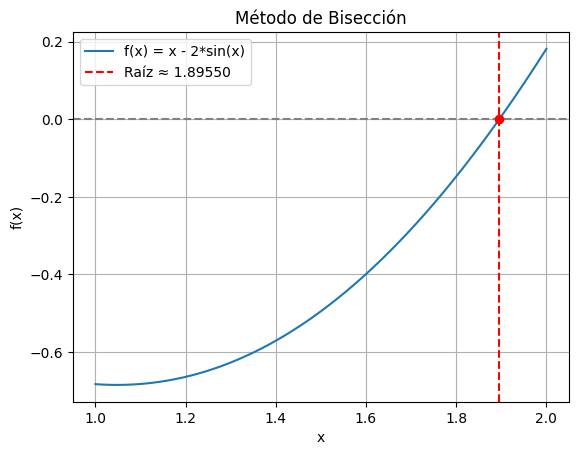

In [10]:

# Función a evaluar
def f(x):
    return x - 2 * np.sin(x)

# Método de bisección sin usar librerías en el cálculo
def metodo_biseccion(fun, inicio, fin, tol, max_iter):
    i = 1
    val_inicio = fun(inicio)

    while i <= max_iter:
        medio = (inicio + fin) / 2
        val_medio = fun(medio)

        if val_medio == 0 or (fin - inicio)/2 < tol:
            print(f"Raíz encontrada en iteración {i}")
            return medio

        i += 1

        if val_inicio * val_medio > 0:
            inicio = medio
            val_inicio = val_medio
        else:
            fin = medio

    print("No se encontró raíz después de", max_iter, "iteraciones")
    return None

raiz = metodo_biseccion(f, 1, 2, 1e-5, 100)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Aquí sí usamos numpy y matplotlib para graficar
    x_vals = np.linspace(1, 2, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color="gray", linestyle="--")
    plt.axvline(raiz, color="red", linestyle="--", label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'ro')
    plt.title("Método de Bisección")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

<h4 style="text-align:center;">Método de Newton</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

Convergencia alcanzada en iteración 5
La raíz aproximada es: 1.8954942670339812


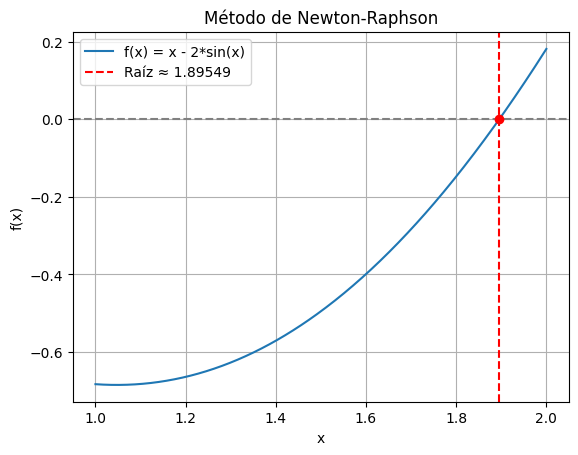

In [12]:

def metodo_newton(func, derivada, x_inicial, tolerancia, max_iter):
    x = x_inicial

    for i in range(1, max_iter + 1):
        fx = func(x)
        dfx = derivada(x)

        if dfx == 0:
            print("Derivada cero en el punto actual. Deteniendo método.")
            return None

        x_nuevo = x - fx / dfx

        if abs(x_nuevo - x) < tolerancia:
            print(f"Convergencia alcanzada en iteración {i}")
            return x_nuevo

        x = x_nuevo

    print(f"No se logró converger después de {max_iter} iteraciones.")
    return None

# Función y su derivada para este ejemplo
def f(x):
    return x - 2 * math.sin(x)

def df(x):
    return 1 - 2 * math.cos(x)

# Parámetros
x0 = 1.5
tol = 1e-5
max_iter = 100

raiz = metodo_newton(f, df, x0, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Para graficar, usamos numpy y matplotlib (solo aquí)
    x_vals = np.linspace(1, 2, 400)
    y_vals = [f(x) for x in x_vals]

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(raiz, color='red', linestyle='--', label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'ro')
    plt.title("Método de Newton-Raphson")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo hallar la raíz.")

<h4 style="text-align:center;">Método de la Secante</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

Convergencia lograda en la iteración 5
La raíz aproximada es: 1.895494266655171


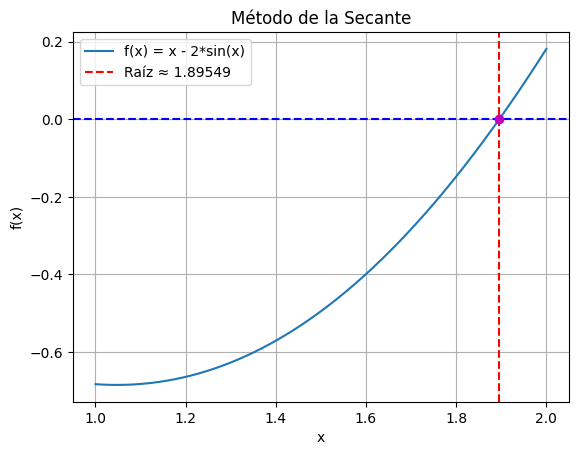

In [ ]:

def metodo_secante(func, x0, x1, tolerancia, max_iter):
    for i in range(1, max_iter + 1):
        f_x0 = func(x0)
        f_x1 = func(x1)

        if f_x1 - f_x0 == 0:
            print("Error: división entre cero. Método detenido.")
            return None

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        if abs(x2 - x1) < tolerancia:
            print(f"Convergencia lograda en la iteración {i}")
            return x2

        x0, x1 = x1, x2

    print(f"No se logró converger tras {max_iter} iteraciones.")
    return None


# Definimos la función (igual que antes)
def f(x):
    return x - 2 * math.sin(x)


# Parámetros iniciales para la secante
x0 = 1.0
x1 = 2.0
tol = 1e-5
max_iter = 100

raiz = metodo_secante(f, x0, x1, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Para graficar sí usamos numpy y matplotlib
    x_vals = np.linspace(1, 2, 400)
    y_vals = [f(x) for x in x_vals]

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color='blue', linestyle='--')
    plt.axvline(raiz, color='red', linestyle='--', label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'mo')  # punto morado para la raíz
    plt.title("Método de la Secante")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo encontrar la raíz.")


<h4 style="text-align:center;">Polinomio de Taylor</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

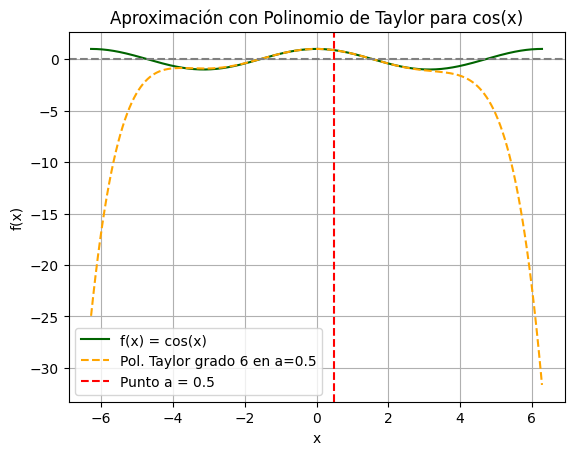

In [14]:
def funcion_coseno(x):
    return np.cos(x)

def derivadas_coseno(orden, x):
    """
    Calcula la derivada n-ésima de cos(x) usando patrón repetitivo:
    cos, -sin, -cos, sin, y luego se repite.
    """
    funciones = [
        np.cos,
        lambda x: -np.sin(x),
        lambda x: -np.cos(x),
        np.sin
    ]
    return funciones[orden % 4](x)

def polinomio_taylor(x, a, grado):
    suma = 0
    for k in range(grado + 1):
        derivada_k = derivadas_coseno(k, a)
        suma += derivada_k * ((x - a) ** k) / math.factorial(k)
    return suma

# Parámetros para la serie
punto_central = 0.5
grado_taylor = 6
x_range = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Valores reales y aproximados
y_real = funcion_coseno(x_range)
y_aprox = polinomio_taylor(x_range, punto_central, grado_taylor)

# Graficar
plt.plot(x_range, y_real, label="f(x) = cos(x)", color="darkgreen")
plt.plot(x_range, y_aprox, linestyle='--', label=f"Pol. Taylor grado {grado_taylor} en a={punto_central}", color="orange")
plt.title("Aproximación con Polinomio de Taylor para cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(punto_central, color="red", linestyle="--", label=f"Punto a = {punto_central}")
plt.grid(True)
plt.legend()
plt.show()


<h4 style="text-align:center;">Series de Maclaurin</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

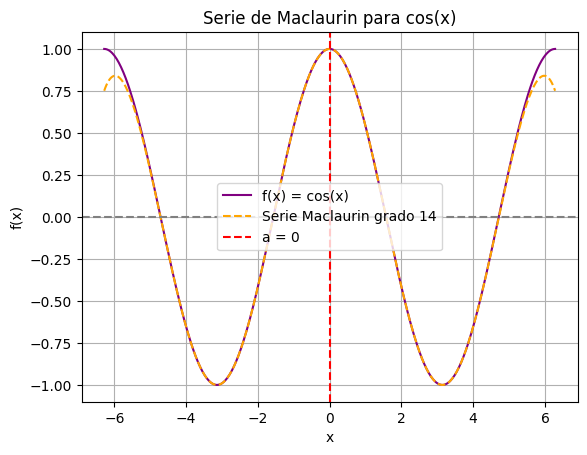

In [15]:
'''
El método de Maclaurin es un caso particular del polinomio de Taylor
donde el punto de expansión es a = 0.
'''

def maclaurin_cos(x_vals, n):
    """
    Serie de Maclaurin para cos(x).
    :param x_vals: Valores donde evaluar la serie
    :param n: Número de términos (grado)
    :return: Aproximación de cos(x) usando Maclaurin
    """
    resultado = 0
    for k in range(n + 1):
        signo = (-1)**k
        resultado += signo * (x_vals ** (2*k)) / math.factorial(2*k)
    return resultado

# Parámetros
grado = 7
x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
y_maclaurin_cos = maclaurin_cos(x_vals, grado)

# Gráfica
plt.plot(x_vals, np.cos(x_vals), label="f(x) = cos(x)", color='purple')
plt.plot(x_vals, y_maclaurin_cos, '--', label=f"Serie Maclaurin grado {2*grado}", color='orange')
plt.title("Serie de Maclaurin para cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="red", linestyle="--", label="a = 0")
plt.grid(True)
plt.legend()
plt.show()


<h4 style="text-align:center;">Polinomio de Lagrange</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

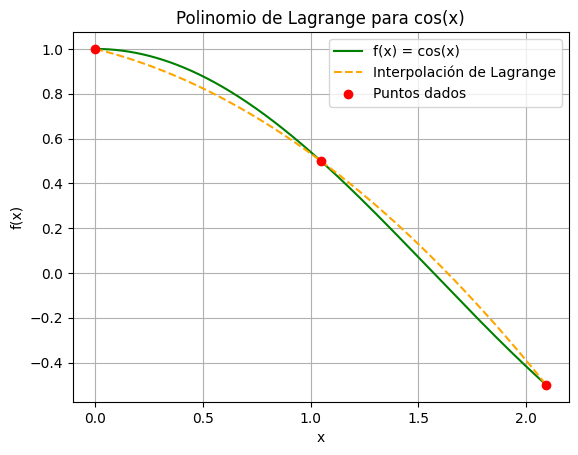

In [17]:
def lagrange_interpol(x_vals, x, y):
    """
    Interpolación de Lagrange para un conjunto de puntos dados.
    :param x_vals: Valores de x donde se evalúa el polinomio
    :param x: Valores conocidos de x
    :param y: Valores conocidos de y correspondientes a x_puntos
    :return: Aproximación interpolada en x_vals
    """
    n = len(x)
    resultado = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (x_vals - x[j]) / (x[i] - x[j])
        resultado += term
    return resultado

# Puntos conocidos para cos(x)
x_puntos = np.array([0, np.pi/3, 2*np.pi/3])
y_puntos = np.cos(x_puntos)

x_vals = np.linspace(0, 2*np.pi/3, 400)
y_lagrange = lagrange_interpol(x_vals, x_puntos, y_puntos)

# Gráfica
plt.plot(x_vals, np.cos(x_vals), label="f(x) = cos(x)", color='green')
plt.plot(x_vals, y_lagrange, '--', label="Interpolación de Lagrange", color='orange')
plt.scatter(x_puntos, y_puntos, color='red', zorder=5, label="Puntos dados")
plt.title("Polinomio de Lagrange para cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


<h4 style="text-align:center;">Spline cúbico natural</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

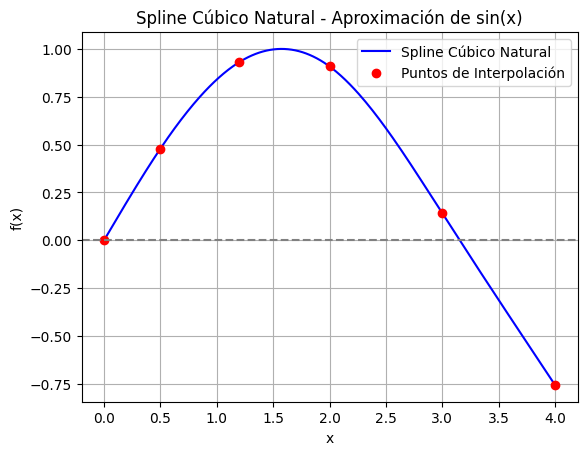

In [ ]:

def spline_cubico_natural(x, y):
    """
    Método de Spline Cúbico Natural para interpolar puntos dados.

    :param x: Lista de coordenadas x de los puntos.
    :param y: Lista de coordenadas y de los puntos.
    :return: Gráfica de la interpolación por Spline Cúbico Natural.
    """
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    # Construir el sistema lineal
    A = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
    b = [0.0 for _ in range(n+1)]

    A[0][0] = 1.0
    A[n][n] = 1.0

    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i]   = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Resolver el sistema (eliminación gaussiana simple)
    def resolver_sistema(A, b):
        n = len(b)
        for i in range(n):
            fila = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[fila] = A[fila], A[i]
            b[i], b[fila] = b[fila], b[i]

            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor

            for k in range(i+1, n):
                f = A[k][i]
                for j in range(i, n):
                    A[k][j] -= f * A[i][j]
                b[k] -= f * b[i]

        sus = [0.0 for _ in range(n)]
        for i in range(n-1, -1, -1):
            sus[i] = b[i] - sum(A[i][j] * sus[j] for j in range(i+1, n))
        return sus

    c = resolver_sistema(A, b)

    a = y[:-1]
    b_coef = []
    d = []

    for i in range(n):
        bi = (y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
        di = (c[i+1] - c[i]) / (3*h[i])
        b_coef.append(bi)
        d.append(di)

    x_vals = []
    y_vals = []
    for i in range(n):
        xi = x[i]
        xf = x[i+1]
        step = (xf - xi) / 50
        for j in range(51):
            xt = xi + j * step
            dx = xt - x[i]
            yt = a[i] + b_coef[i]*dx + c[i]*dx**2 + d[i]*dx**3
            x_vals.append(xt)
            y_vals.append(yt)

    plt.plot(x_vals, y_vals, label="Spline Cúbico Natural", color="blue")
    plt.plot(x, y, 'ro', label="Puntos de Interpolación")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Spline Cúbico Natural - Aproximación de sin(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Nuevos puntos aproximando sin(x)
x = [0, 0.5, 1.2, 2.0, 3.0, 4.0]
y = [math.sin(xi) for xi in x]

spline_cubico_natural(x, y)

<h4 style="text-align:center;">Spline cúbico condicionado</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

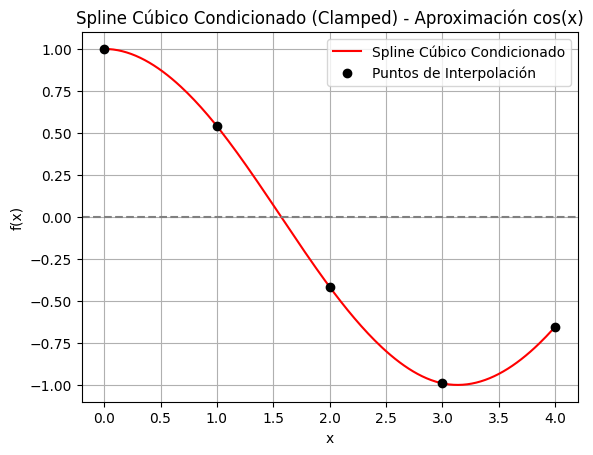

In [19]:
def spline_cubico_condicionado(x, y, fp0, fpn):
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    A = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
    b = [0.0 for _ in range(n+1)]

    A[0][0] = 2 * h[0]
    A[0][1] = h[0]
    b[0] = 3 * ((y[1] - y[0]) / h[0] - fp0)

    A[n][n-1] = h[n-1]
    A[n][n] = 2 * h[n-1]
    b[n] = 3 * (fpn - (y[n] - y[n-1]) / h[n-1])

    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    def resolver_sistema(A, b):
        n = len(b)
        for i in range(n):
            fila = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[fila] = A[fila], A[i]
            b[i], b[fila] = b[fila], b[i]
            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor
            for k in range(i+1, n):
                f = A[k][i]
                for j in range(i, n):
                    A[k][j] -= f * A[i][j]
                b[k] -= f * b[i]

        sus = [0.0 for _ in range(n)]
        for i in range(n-1, -1, -1):
            sus[i] = b[i] - sum(A[i][j] * sus[j] for j in range(i+1, n))
        return sus

    c = resolver_sistema(A, b)

    a = y[:-1]
    b_coef = []
    d = []

    for i in range(n):
        bi = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        di = (c[i+1] - c[i]) / (3 * h[i])
        b_coef.append(bi)
        d.append(di)

    x_vals = []
    y_vals = []
    for i in range(n):
        xi = x[i]
        xf = x[i+1]
        step = (xf - xi) / 50
        for j in range(51):
            xt = xi + j * step
            dx = xt - x[i]
            yt = a[i] + b_coef[i] * dx + c[i] * dx**2 + d[i] * dx**3
            x_vals.append(xt)
            y_vals.append(yt)

    plt.plot(x_vals, y_vals, label="Spline Cúbico Condicionado", color="red")
    plt.plot(x, y, 'ko', label="Puntos de Interpolación")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Spline Cúbico Condicionado (Clamped) - Aproximación cos(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Nuevos puntos basados en cos(x)
x = [0, 1, 2, 3, 4]
y = [math.cos(xi) for xi in x]

# Derivadas coherentes con cos(x)
fp0 = -math.sin(x[0])  # derivada en x=0, -sin(0) = 0
fpn = -math.sin(x[-1]) # derivada en x=4

spline_cubico_condicionado(x, y, fp0, fpn)

<h4 style="text-align:center;">Método de Mínimos Cuadrados</h4>

Texto de ser necesario, alguna explicación, aclaración o generalización para realizar el tema.

Coeficientes ajustados:
a0 = 1.280556
a1 = -5.156451
a2 = 1.826720
a3 = 3.841226


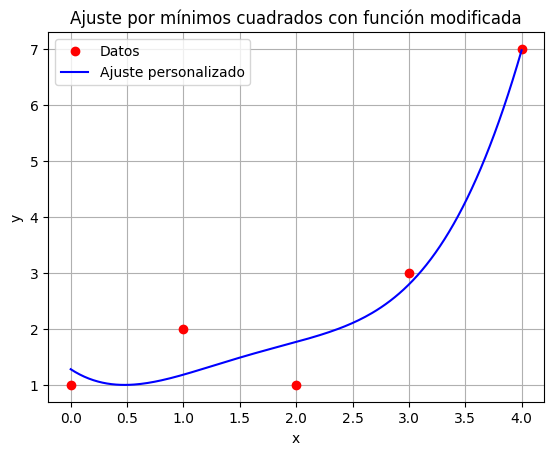

In [20]:
def eliminacion_gaussiana(A, b):
    n = len(b)
    # Eliminación hacia adelante
    for i in range(n):
        # Buscar pivote
        max_fila = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_fila] = A[max_fila], A[i]
        b[i], b[max_fila] = b[max_fila], b[i]
        
        pivote = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivote
        b[i] /= pivote
        
        for k in range(i+1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]

    # Sustitución hacia atrás
    x = [0]*n
    for i in range(n-1, -1, -1):
        x[i] = b[i] - sum(A[i][j]*x[j] for j in range(i+1, n))
    return x

def minimos_cuadrados_modificado(x, y):
    """
    Ajusta una función tipo: a0 + a1*x + a2*x^2 + a3*sin(x)
    usando mínimos cuadrados, con resolución manual del sistema normal.
    """
    n = len(x)
    # Construir matriz de diseño X con columnas: 1, x, x^2, sin(x)
    X = []
    for i in range(n):
        X.append([1, x[i], x[i]**2, math.sin(x[i])])

    # Calcular A = X^T X y b = X^T y
    m = 4  # número de coeficientes
    A = [[0]*m for _ in range(m)]
    b_vec = [0]*m

    for i in range(m):
        for j in range(m):
            A[i][j] = sum(X[k][i] * X[k][j] for k in range(n))
        b_vec[i] = sum(X[k][i] * y[k] for k in range(n))

    coeficientes = eliminacion_gaussiana(A, b_vec)

    print("Coeficientes ajustados:")
    print(f"a0 = {coeficientes[0]:.6f}")
    print(f"a1 = {coeficientes[1]:.6f}")
    print(f"a2 = {coeficientes[2]:.6f}")
    print(f"a3 = {coeficientes[3]:.6f}")

    x_plot = np.linspace(min(x), max(x), 200)
    y_plot = [coeficientes[0] + coeficientes[1]*xi + coeficientes[2]*xi**2 + coeficientes[3]*math.sin(xi) for xi in x_plot]

    plt.plot(x, y, 'ro', label="Datos")
    plt.plot(x_plot, y_plot, 'b-', label="Ajuste personalizado")
    plt.title("Ajuste por mínimos cuadrados con función modificada")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejemplo
x = [0, 1, 2, 3, 4]
y = [1, 2, 1, 3, 7]
minimos_cuadrados_modificado(x, y)
